<img src="Tarjeta.png">

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Lectura--de-los-datos" data-toc-modified-id="Lectura--de-los-datos-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Lectura  de los datos</a></span></li><li><span><a href="#Creamos-y-'fiteamos'-(entrenamos)-el-modelo" data-toc-modified-id="Creamos-y-'fiteamos'-(entrenamos)-el-modelo-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Creamos y 'fiteamos' (entrenamos) el modelo</a></span></li><li><span><a href="#Predicciones" data-toc-modified-id="Predicciones-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Predicciones</a></span></li><li><span><a href="#Visualización-de-resultados" data-toc-modified-id="Visualización-de-resultados-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Visualización de resultados</a></span></li><li><span><a href="#Descomposición-de-resultados" data-toc-modified-id="Descomposición-de-resultados-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Descomposición de resultados</a></span></li><li><span><a href="#Incluir-vacaciones" data-toc-modified-id="Incluir-vacaciones-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Incluir vacaciones</a></span></li><li><span><a href="#Más-variables-externas-(regresores)" data-toc-modified-id="Más-variables-externas-(regresores)-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Más variables externas (regresores)</a></span></li><li><span><a href="#Ejercicio-para-hacer-en-clase" data-toc-modified-id="Ejercicio-para-hacer-en-clase-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Ejercicio para hacer en clase</a></span></li></ul></div>

# Install and Import Prophet

Prophet es un procedimiento/algoritmo de predicción de datos de series temporales basado en un modelo aditivo en el que las tendencias no lineales se ajustan a la estacionalidad anual, semanal y diaria, además de los efectos de las vacaciones. Prophet funciona mejor con series temporales que presentan fuertes efectos estacionales (ya sean semalanes, mensuales) y una cantidad suficiente de datos históricos donde queda representada esa estacionalidad. Prophet es robusto a los missing data y a los cambios de tendencia, y suele manejar bien outliers.

Se trata es un software de código abierto publicado por el equipo de Core Data Science de Facebook. Está disponible para su descarga en CRAN (R) y PyPI(Python)




In [1]:
import pandas as pd
from prophet import Prophet
import plotly.express as px
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Ejemplo básico

Vamos a empezar con un ejemplo sencillo de la librería para entender el procedimiento principal.

## Lectura  de los datos

Los datos de entrada a Prophet es siempre un con dos columnas: ds e y. La columna ds (datestamp) debe tener el formato esperado por Pandas, idealmente YYYY-MM-DD para una fecha o YYYY-MM-DD HH:MM:SS para una marca de tiempo. La columna y debe ser numérica, y representa la medida que deseamos pronosticar.

Como ejemplo, veremos una serie temporal del registro de visitas diarias a la página de Wikipedia de Peyton Manning. Esta siere es un buen ejemplo porque ilustra algunas de las características de Prophet, como la estacionalidad múltiple (semanal, mensual), las tasas de crecimiento cambiantes y la capacidad de modelar días especiales (como las apariciones de Manning en los playoffs y la superbowl).



In [2]:
link = 'https://raw.githubusercontent.com/facebook/prophet/master/examples/example_wp_log_peyton_manning.csv'
df = pd.read_csv(link)

In [3]:
df.head(5)

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [4]:
df.dtypes

ds     object
y     float64
dtype: object

In [5]:
df['ds'] = pd.to_datetime(df['ds'])

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
y,2905.0,8.138958,0.845957,5.26269,7.5148,7.997999,8.580168,12.846747


In [7]:
px.line(df, x ='ds', y = 'y')

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
y,2905.0,8.138958,0.845957,5.26269,7.5148,7.997999,8.580168,12.846747


***

## Creamos y 'fiteamos' (entrenamos) el modelo

In [9]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -19.4685
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7976.66    0.00444357       453.026           1           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     187       7991.33   3.47837e-05       114.938   3.253e-07       0.001      269  LS failed, Hessian reset 
     199       7992.36   0.000526128       162.677           1           1      283   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     292       7998.14   4.23891e-05       142.064   2.782e-07       0.001      436  LS failed, Hessian reset 
     299       7998.58   0.000381087       163.741      0.2361           1      447   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       8001.14   3.07041e-05       62.7479           1           1      578   
    Iter      log pro

## Predicciones
En primer lugar, generamos el dataset que queremos predecir. Las predicciones se realizan en un dataframe con una columna ds que contiene las fechas para las que se va a realizar una predicción. Se puede obtener un dataframe que se extienda hacia el futuro un número determinado de días utilizando el método Prophet.make_future_dataframe. Por defecto también incluirá las fechas históricas con las que entrenamos el modelo, por lo que también veremosla bondad del ajuste del modelo

In [10]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


A continuación, generamos la predicción.

In [11]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.204617,7.515618,8.916337
3266,2017-01-16,8.529628,7.856327,9.304614
3267,2017-01-17,8.317021,7.585005,9.066024
3268,2017-01-18,8.149634,7.394968,8.856180
3269,2017-01-19,8.161561,7.482792,8.950557


In [12]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-12-10,8.040332,8.230666,9.478217,8.040332,8.040332,0.802939,0.802939,0.802939,0.352293,0.352293,0.352293,0.450646,0.450646,0.450646,0.0,0.0,0.0,8.843271
1,2007-12-11,8.038784,7.934827,9.220918,8.038784,8.038784,0.553013,0.553013,0.553013,0.119631,0.119631,0.119631,0.433382,0.433382,0.433382,0.0,0.0,0.0,8.591798
2,2007-12-12,8.037237,7.738220,9.026864,8.037237,8.037237,0.350390,0.350390,0.350390,-0.066664,-0.066664,-0.066664,0.417054,0.417054,0.417054,0.0,0.0,0.0,8.387628
3,2007-12-13,8.035690,7.769479,8.975063,8.035690,8.035690,0.329853,0.329853,0.329853,-0.072254,-0.072254,-0.072254,0.402107,0.402107,0.402107,0.0,0.0,0.0,8.365543
4,2007-12-14,8.034143,7.723001,8.942405,8.034143,8.034143,0.319375,0.319375,0.319375,-0.069571,-0.069571,-0.069571,0.388946,0.388946,0.388946,0.0,0.0,0.0,8.353518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3265,2017-01-15,7.186554,7.515618,8.916337,6.884139,7.578143,1.018063,1.018063,1.018063,0.048279,0.048279,0.048279,0.969784,0.969784,0.969784,0.0,0.0,0.0,8.204617
3266,2017-01-16,7.185524,7.856327,9.304614,6.881272,7.578844,1.344104,1.344104,1.344104,0.352293,0.352293,0.352293,0.991812,0.991812,0.991812,0.0,0.0,0.0,8.529628
3267,2017-01-17,7.184494,7.585005,9.066024,6.878405,7.579480,1.132527,1.132527,1.132527,0.119631,0.119631,0.119631,1.012896,1.012896,1.012896,0.0,0.0,0.0,8.317021
3268,2017-01-18,7.183464,7.394968,8.856180,6.875537,7.580116,0.966170,0.966170,0.966170,-0.066664,-0.066664,-0.066664,1.032834,1.032834,1.032834,0.0,0.0,0.0,8.149634


## Visualización de resultados

En primer lugar, visualizamos los resultados del modelo

In [13]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

## Descomposición de resultados


Si queremos ver los componentes del pronóstico, podemos utilizar el método Prophet.plot_components. Por defecto, se verá la tendencia, la estacionalidad anual y la estacionalidad semanal de la serie temporal. Si se incluye los días festivos, también apareceran en la grafica.
Si queremos ver los componentes del pronóstico, podemos utilizar el método Prophet.plot_components. Por defecto, se verá la tendencia, la estacionalidad anual y la estacionalidad semanal de la serie temporal. Si se incluye los días festivos, también apareceran en la grafica.


In [14]:
plot_components_plotly(m, forecast)

<hr style="height:5px;border-width:0;color:orange;background-color:orange">

<hr style="height:5px;border-width:0;color:orange;background-color:orange">

# More Advanced Features (Cross Validation)

In [16]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')

INFO:prophet:Making 11 forecasts with cutoffs between 2010-02-15 00:00:00 and 2015-01-20 00:00:00
  0%|                                                                                                                                                                             | 0/11 [00:00<?, ?it/s]

Initial log joint probability = -6.79277
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2213.96   0.000765455       186.567      0.5305      0.5305      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        2215.4   7.87324e-05       68.5756      0.5695      0.5695      260   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     257       2215.79   0.000118818       128.531   1.139e-06       0.001      377  LS failed, Hessian reset 
     299       2215.83   9.89228e-07       87.9702       0.362           1      432   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     304       2215.83    3.4679e-08       73.6553     0.01288           1      441   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


  9%|███████████████                                                                                                                                                      | 1/11 [00:01<00:10,  1.02s/it]

Initial log joint probability = -6.89856
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2678.16    0.00239709       130.147      0.7462      0.7462      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2680.42   0.000127936       73.7326      0.7894      0.7894      261   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     222       2680.49   8.66554e-05       108.201    8.87e-07       0.001      335  LS failed, Hessian reset 
     291       2680.84   8.22584e-05       114.109   7.052e-07       0.001      468  LS failed, Hessian reset 
     299       2680.91    0.00021504       85.2174           1           1      476   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     396       2681.43   0.000307983       247.014   1.817e-06       0.001      640  LS failed, Hessian rese

 18%|██████████████████████████████                                                                                                                                       | 2/11 [00:02<00:10,  1.15s/it]

Initial log joint probability = -8.79007
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3140.97    0.00235612       432.319      0.3852           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     197       3142.76   0.000125897       146.666   1.352e-06       0.001      290  LS failed, Hessian reset 
     199       3142.78   0.000723311       129.183           1           1      292   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     252       3143.25   0.000103547       143.845   5.767e-07       0.001      405  LS failed, Hessian reset 
     299       3143.34   3.55194e-05        50.275           1           1      469   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     358       3143.69   0.000378248       227.676   5.626e-06       0.001      606  LS failed, Hessian rese

 27%|█████████████████████████████████████████████                                                                                                                        | 3/11 [00:03<00:09,  1.17s/it]

Initial log joint probability = -9.06272
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        3660.8    0.00463477       587.119      0.4134           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     148       3664.31   5.29138e-05       90.8808   4.391e-07       0.001      221  LS failed, Hessian reset 
     199       3664.91   0.000205857       72.0642           1           1      282   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     215       3665.21     9.086e-05       156.298    6.26e-07       0.001      335  LS failed, Hessian reset 
     288       3666.33   9.44334e-05       114.871   3.092e-07       0.001      460  LS failed, Hessian reset 
     299       3666.65    0.00164773       86.9239      0.9793      0.9793      474   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

 36%|████████████████████████████████████████████████████████████                                                                                                         | 4/11 [00:04<00:09,  1.31s/it]

Initial log joint probability = -30.435
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4118.91     0.0133621        95.082           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     137       4121.05   0.000108029       161.729   3.153e-07       0.001      203  LS failed, Hessian reset 
     179       4122.55   0.000331743       136.227   2.117e-06       0.001      303  LS failed, Hessian reset 
     199       4122.77   0.000123315       52.6539      0.2673      0.2673      326   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4123.38   0.000116965       78.8799      0.2595           1      459   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     319       4123.69   9.97652e-05       160.741   3.413e-07       0.001      524  LS failed, Hessian reset

 45%|███████████████████████████████████████████████████████████████████████████                                                                                          | 5/11 [00:06<00:07,  1.28s/it]

Initial log joint probability = -10.2217
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        4522.2    0.00806466       479.812       5.059      0.5059      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4524.63   0.000776563       170.199       7.729      0.7729      243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     205       4524.68   5.58729e-05       102.536   5.902e-07       0.001      285  LS failed, Hessian reset 
     290       4525.66   0.000231868       338.967   7.229e-07       0.001      428  LS failed, Hessian reset 
     299       4525.87   0.000581988       83.1987           1           1      440   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     368       4526.16   0.000162951       116.308   1.882e-06       0.001      576  LS failed, Hessian rese

 55%|██████████████████████████████████████████████████████████████████████████████████████████                                                                           | 6/11 [00:07<00:06,  1.27s/it]

Initial log joint probability = -11.8515
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5000.9     0.0144172       656.019      0.3282           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     187       5010.55   9.80472e-05        182.85   4.787e-07       0.001      269  LS failed, Hessian reset 
     199       5010.98    0.00112974       162.495           1           1      282   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5011.87    0.00016585       64.4777      0.6578      0.6578      421   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     360       5012.04   0.000265837       124.037   3.201e-06       0.001      578  LS failed, Hessian reset 
     399       5012.19   0.000150399       63.7703       1.443      0.1443      624   
    Iter      log pro

 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                                            | 7/11 [00:08<00:05,  1.28s/it]

Initial log joint probability = -12.6813
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5544.33    0.00553875       669.738           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        5556.4    0.00517094       199.786           1           1      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     283       5557.53   5.00664e-05       109.736   2.571e-07       0.001      396  LS failed, Hessian reset 
     298        5557.6    2.7489e-05       73.1815   2.777e-07       0.001      450  LS failed, Hessian reset 
     299        5557.6    4.3541e-05       71.7487       4.631           1      453   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     340       5557.74   4.82201e-05       116.997   3.652e-07       0.001      556  LS failed, Hessian rese

 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                             | 8/11 [00:10<00:04,  1.38s/it]

Initial log joint probability = -18.0636
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5945.49   0.000763575       131.491           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5957.54    0.00107066       188.661      0.5769      0.5769      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     213       5958.38   4.67901e-05       105.971   4.938e-07       0.001      310  LS failed, Hessian reset 
     229        5958.9    5.6411e-05       111.584   2.553e-07       0.001      374  LS failed, Hessian reset 
     259       5959.86   0.000199785       169.888   1.748e-06       0.001      444  LS failed, Hessian reset 
     299       5960.66   6.03959e-05       71.5806      0.6432      0.6432      493   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                              | 9/11 [00:12<00:03,  1.53s/it]

Initial log joint probability = -12.4143
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6466.64     0.0117815       893.813           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6481.32    0.00128537       547.445      0.5828      0.5828      230   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     235       6483.59   0.000110075       217.244   1.011e-06       0.001      315  LS failed, Hessian reset 
     299       6485.83    0.00370358       153.297      0.7622      0.7622      392   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6488.01   0.000313397       76.7117      0.9123     0.09123      525   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     427        6488.6   7.50378e-05    

 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████               | 10/11 [00:13<00:01,  1.52s/it]

Initial log joint probability = -17.0767
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6969.71    0.00846421       482.401      0.5946      0.5946      111   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6977.46   0.000930494       333.573      0.2383      0.5458      224   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6980.59   0.000238203       168.017      0.6007      0.6007      351   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399          6981   0.000386078       73.8772       2.973      0.4435      477   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       6982.37   0.000771604       95.5068      0.4413           1      602   
    Iter      log prob        ||dx||      ||grad||       alpha  

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:15<00:00,  1.39s/it]


La utilidad performance_metrics puede utilizarse para calcular algunas estadísticas útiles del rendimiento de la predicción (yhat, yhat_lower y yhat_upper en comparación con y), en función de la distancia del punto de corte (lo lejos que estaba la predicción en el futuro). Los estadísticos calculados son el error medio cuadrático (MSE), el error medio cuadrático (RMSE), el error medio absoluto (MAE), el error medio porcentual absoluto (MAPE), el error medio porcentual absoluto (MDAPE) y la cobertura de las estimaciones yhat_lower y yhat_upper. Se calculan sobre una ventana deslizante de las predicciones en df_cv después de ordenarlas por horizonte (ds menos el corte). Por defecto, el 10% de las predicciones se incluirán en cada ventana, pero esto puede cambiarse con el argumento rolling_window.

In [17]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2010-02-16,8.956550,8.458083,9.462674,8.242493,2010-02-15
1,2010-02-17,8.722978,8.230375,9.209507,8.008033,2010-02-15
2,2010-02-18,8.606710,8.091950,9.077284,8.045268,2010-02-15
3,2010-02-19,8.528551,8.056621,9.017436,7.928766,2010-02-15
4,2010-02-20,8.270480,7.770766,8.783287,7.745003,2010-02-15
...,...,...,...,...,...,...
3983,2016-01-16,8.577176,7.820673,9.294383,7.817223,2015-01-20
3984,2016-01-17,8.971824,8.221914,9.690251,9.273878,2015-01-20
3985,2016-01-18,9.277937,8.546378,10.026241,10.333775,2015-01-20
3986,2016-01-19,9.061058,8.283597,9.818238,9.125871,2015-01-20


In [18]:
df_cv.cutoff.value_counts()

2010-08-14    365
2012-02-05    364
2012-08-03    364
2013-07-29    364
2014-01-25    364
2013-01-30    363
2014-07-24    363
2015-01-20    363
2011-02-10    361
2011-08-09    360
2010-02-15    357
Name: cutoff, dtype: int64

In [19]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv, rolling_window = 0)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,1 days,0.987896,0.993930,0.606471,0.061844,0.050506,0.063672,0.545455
1,2 days,0.408675,0.639277,0.520031,0.058669,0.061059,0.058244,0.545455
2,3 days,0.470490,0.685923,0.615219,0.072404,0.076582,0.071280,0.454545
3,4 days,0.449340,0.670328,0.562475,0.066380,0.072854,0.065343,0.363636
4,5 days,0.523356,0.723434,0.621125,0.071657,0.085417,0.071075,0.363636
...,...,...,...,...,...,...,...,...
360,361 days,2.017139,1.420260,1.159748,0.130456,0.119779,0.129573,0.363636
361,362 days,1.300156,1.140244,0.998314,0.117576,0.101730,0.115281,0.363636
362,363 days,1.499376,1.224490,1.058453,0.125183,0.102173,0.121157,0.272727
363,364 days,1.494346,1.222434,1.006240,0.122032,0.108101,0.118139,0.363636


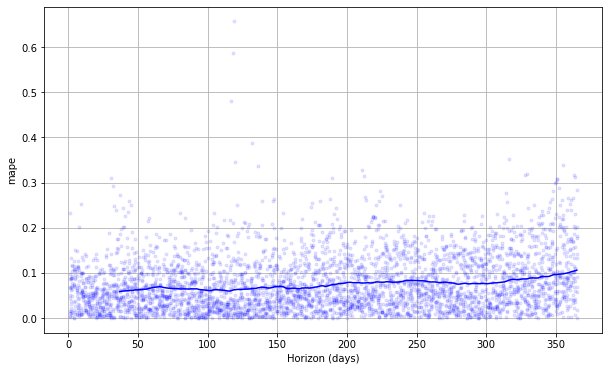

In [20]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')


## Incluir vacaciones

Si tienes días festivos u otros eventos recurrentes que quieres modelar, hay que crear un dataframe para ellos. Tiene dos columnas (holiday y ds) y una fila para cada muestra dek holiday. Hay incluir todas las filas del evento tanto en el pasado como en el gutru (hasta donde llegan los datos históricos) como en el futuro (hasta donde se realiza la previsión). Si no se repiten en el futuro, Prophet las modelará y no las incluirá en la previsión.m = Prophet(holidays=holidays)
forecast = m.fit(df).predict(future)


También puedes incluir las columnas lower_window, upper_window, que extienden el día festivo hasta [ventana_inferior, ventana_superior] días alrededor de la fecha. (vísperas) Por ejemplo, si quieres incluir la Nochebuena además de la Navidad, incluiría lower_window=-1,upper_window=0. Si quieres utilizar el Black Friday además del Día de Acción de Gracias, incluiría lower_window=0,upper_window=1. También se puede incluir una columna prior_scale para establecer la escala previa por separado para cada fiesta, como se describe a continuación.

In [ ]:

# Python
playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                        '2010-01-24', '2010-02-07', '2011-01-08',
                        '2013-01-12', '2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((playoffs, superbowls))


In [ ]:
holidays

In [ ]:

m = Prophet(holidays=holidays)
forecast = m.fit(df).predict(future)

Incluimos el argument

In [ ]:
forecast[(forecast['playoff'] + forecast['superbowl']).abs() > 0][
        ['ds', 'playoff', 'superbowl']][-10:]

Los efectos de las vacaciones también aparecerán en el gráfico de componentes, donde vemos que hay un pico en los días cercanos a las apariciones en los playoffs, con un pico especialmente grande para la superbowl

In [ ]:
fig = m.plot_components(forecast)

In [ ]:
m = Prophet(holidays=holidays)
m.add_country_holidays(country_name='US')
m.fit(df)

In [ ]:
m.train_holiday_names

In [ ]:
forecast = m.predict(future)
fig = m.plot_components(forecast)


Las fiestas se  pueden trazar utilizando la función plot_forecast_component (importada de prophet.plot en Python) como plot_forecast_component(m, forecast, 'superbowl') para trazar sólo el componente festivo de la superbowl.

## Más variables externas (regresores)

Se pueden añadir variables(regresores) adicionales a la parte lineal del modelo utilizando el método o la función add_regressor. Una columna con el valor del regresor tendrá que estar presente en datos de train y predicción. Por ejemplo, podemos añadir un efecto adicional los domingos durante la temporada de la NFL. En el gráfico de componentes, este efecto aparecerá en el gráfico 'extra_regressors':

In [ ]:

def nfl_sunday(ds):
    date = pd.to_datetime(ds)
    if date.weekday() == 6 and (date.month > 8 or date.month < 2):
        return 1
    else:
        return 0
df['nfl_sunday'] = df['ds'].apply(nfl_sunday)

m = Prophet()
m.add_regressor('nfl_sunday')
m.fit(df)

future['nfl_sunday'] = future['ds'].apply(nfl_sunday)

forecast = m.predict(future)
fig = m.plot_components(forecast)


Los domingos de la NFL también podrían haberse manejado utilizando la interfaz de "vacaciones" descrita anteriormente, creando una lista de domingos de la NFL pasados y futuros. La función add_regressor proporciona una interfaz más general para definir regresores lineales adicionales, y en particular no requiere que el regresor sea un indicador binario. Se podría utilizar otra serie temporal como regresor, aunque habría que conocer sus valores futuros.
Coeficientes de los regresores adicionales
Para extraer los coeficientes beta de los regresores adicionales, existe la función de utilidad regressor_coefficients (from prophet.utilities import regressor_coefficients) en el modelo ajustado. El coeficiente beta estimado para cada regresor representa aproximadamente el incremento en el valor de la predicción para un incremento unitario en el valor del regresor (tenga en cuenta que los coeficientes devueltos están siempre en la escala de los datos originales). Si se especifica mcmc_samples, también se devuelve un intervalo creíble para cada coeficiente, que puede ayudar a identificar si cada regresor es "estadísticamente significativo".

## Ejercicio para hacer en clase

In [ ]:
link_pax = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df_pax =  pd.read_csv(link_pax, parse_dates = ['Month'])
df_pax.head(5)

In [ ]:
df_pax.columns = ['ds','y']

In [ ]:
m = Prophet()
m.fit(df_pax)

In [ ]:
future = m.make_future_dataframe(periods=120, freq = 'M')
future.tail()

In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [ ]:
future = m.make_future_dataframe(periods = 0)
future.tail()
forecast = m.predict(future)

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [ ]:
plot_components_plotly(m, forecast)

In [ ]:
mean_absolute_error(df_pax.y, forecast.yhat)